In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Applying the text cleaning
import re
import string


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import pickle

In [3]:
#reading the csv data
df=pd.read_csv("C:/Users/Deepika/Downloads/archive.zip")

In [4]:
df

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [5]:
 df.shape

(10570, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     10570 non-null  object
 1   URL                       10570 non-null  object
 2   News                      10570 non-null  object
 3   Price Direction Up        10570 non-null  int64 
 4   Price Direction Constant  10570 non-null  int64 
 5   Price Direction Down      10570 non-null  int64 
 6   Asset Comparision         10570 non-null  int64 
 7   Past Information          10570 non-null  int64 
 8   Future Information        10570 non-null  int64 
 9   Price Sentiment           10570 non-null  object
dtypes: int64(6), object(4)
memory usage: 825.9+ KB


In [7]:
df.isnull().sum()

Dates                       0
URL                         0
News                        0
Price Direction Up          0
Price Direction Constant    0
Price Direction Down        0
Asset Comparision           0
Past Information            0
Future Information          0
Price Sentiment             0
dtype: int64

In [8]:
df['Price Sentiment'].value_counts()

positive    4412
negative    3814
none        1968
neutral      376
Name: Price Sentiment, dtype: int64

In [9]:
df['Price Sentiment'].unique()

array(['negative', 'positive', 'none', 'neutral'], dtype=object)

In [10]:
df=df.rename(columns={"Price Sentiment":"Price_Sentiment"})

In [11]:
df

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price_Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [12]:
df['Price_Sentiment'].value_counts()

positive    4412
negative    3814
none        1968
neutral      376
Name: Price_Sentiment, dtype: int64

In [13]:
#Add the new column which gives a unique number to each of these labels 
df['label_num'] = df['Price_Sentiment'].map({'negative': 1, 'positive': 2,'none':2,'neutral':3})

In [14]:
df.head(5)

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price_Sentiment,label_num
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative,1
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative,1
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive,2
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none,2
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative,1


Text(0.5, 1.0, 'Price_Sentiment')

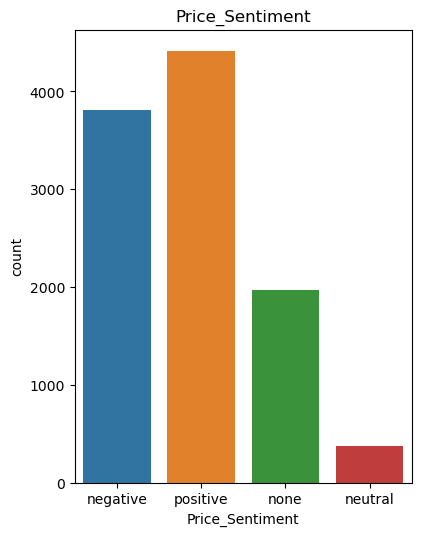

In [15]:
#handling imbalance data
plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
sns.countplot(x=df['Price_Sentiment'])
plt.title('Price_Sentiment') 

In [16]:
#Descriptive statistical (statistic data like mean,median,mode etc)
#to describe the dataset
df.describe(include='all')


,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price_Sentiment,label_num
count,10570,10570,10570,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.00000,10570,10570.000000
unique,3761,10570,10570,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,30-08-2017,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",NaN,NaN,NaN,NaN,NaN,NaN,positive,NaN
freq,18,1,1,NaN,NaN,NaN,NaN,NaN,NaN,4412,NaN
mean,NaN,NaN,NaN,0.417408,0.042006,0.370104,0.189309,0.969915,0.03018,NaN,1.674740
std,NaN,NaN,NaN,0.493155,0.200612,0.482855,0.391773,0.170830,0.17109,NaN,0.539109
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,1.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,NaN,1.000000
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,NaN,2.000000
75%,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,NaN,2.000000


positive    4412
negative    3814
none        1968
neutral      376
Name: Price_Sentiment, dtype: int64

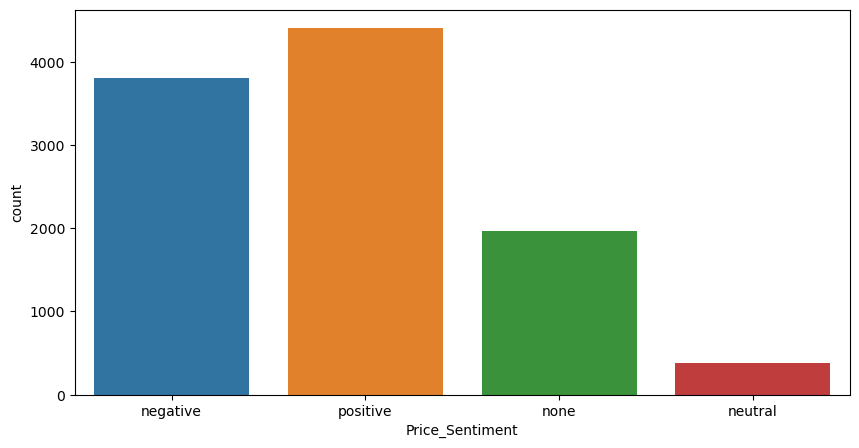

In [17]:
#visual analysis respresentation such as charts,plots ,graphs etc
#univariate analysis
plt.figure(figsize=(10,5))
sns.countplot(x=df['Price_Sentiment'])
df['Price_Sentiment'].value_counts()

<Axes: xlabel='Price_Sentiment', ylabel='count'>

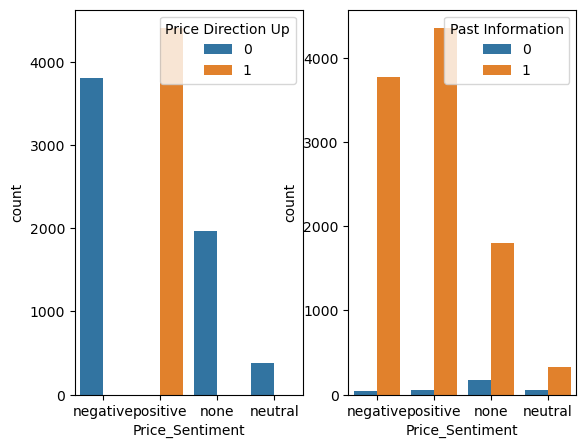

In [18]:
#Bivariate analysis
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.countplot(x=df['Price_Sentiment'],hue=df['Price Direction Up'])
plt.subplot(132)
sns.countplot(x=df['Price_Sentiment'],hue=df['Past Information'])

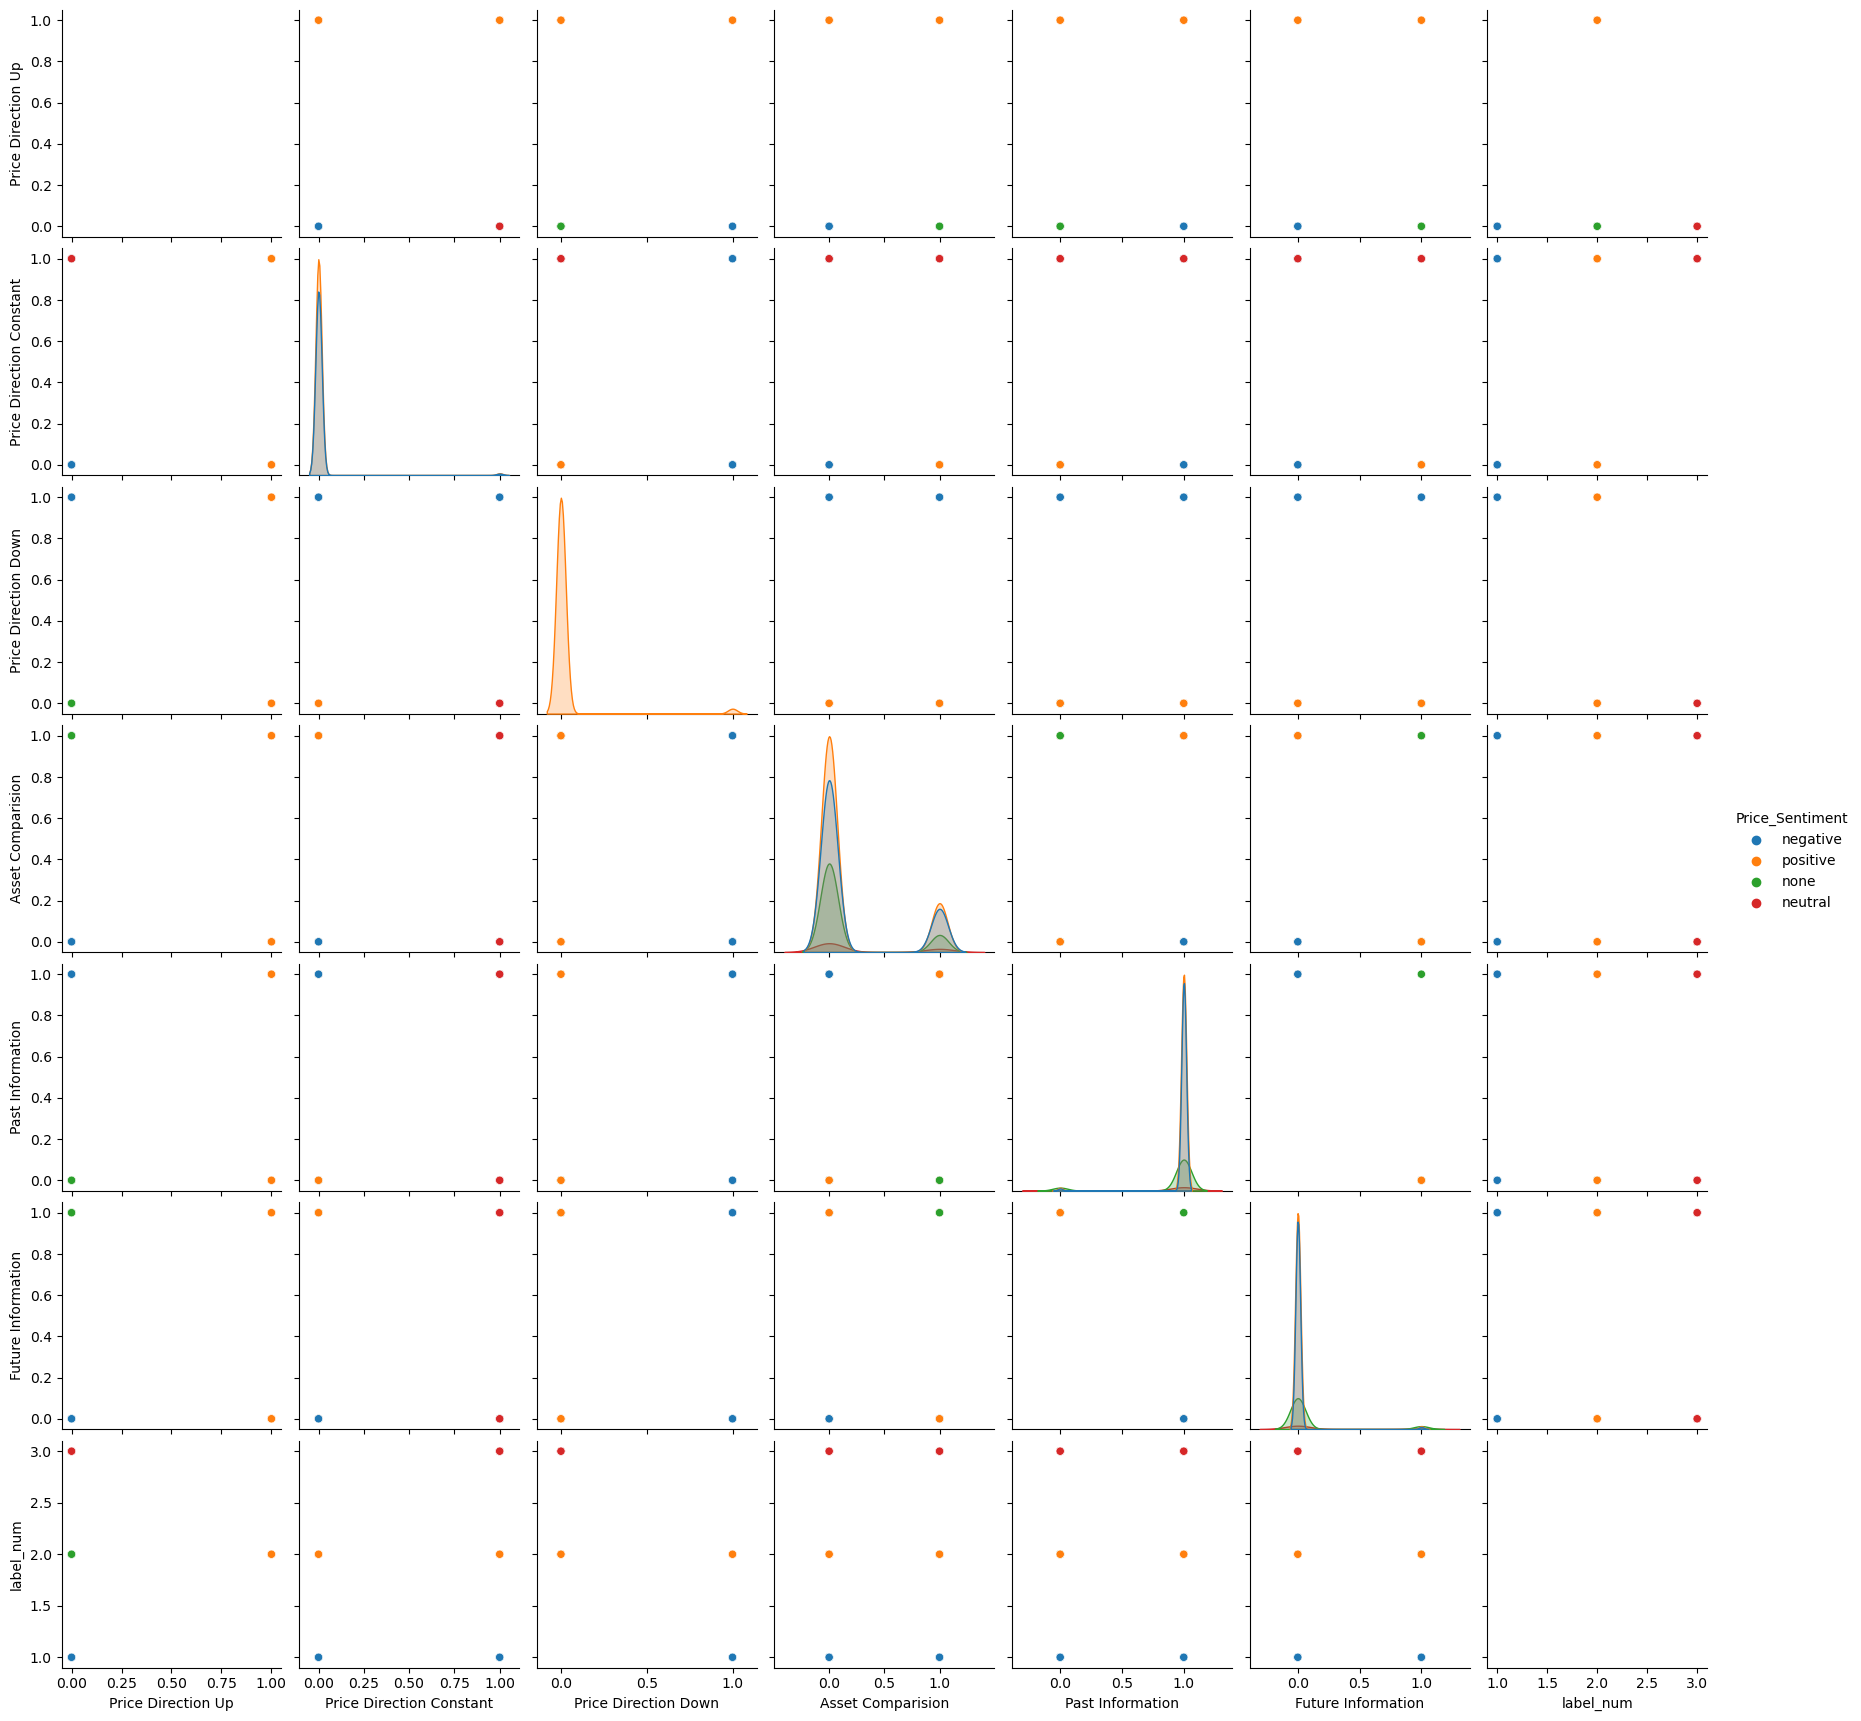

In [19]:
#multivariate analysis
sns.pairplot(df,hue='Price_Sentiment')

In [20]:
#regular expression which is used to remove the white space,punctuation & other non-alphanumeric char
def text_clean_1(text):
    text=text.lower() #convert to lower case
    text=re.sub('\[.*?\]','',text)  #remove .,?,"",[]
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)      #will remove "",.
    text=re.sub('\w*\d\w*','',text)
    text=re.sub('[''""...]','',text)   #remove ',',",",....
    text=re.sub('\n','',text)
    return text
cleaned_News=lambda x:text_clean_1(x)

In [21]:
#after text pre processing
# the cleaned data stoed in new colum
df['cleaned_News']=pd.DataFrame(df.News.apply(cleaned_News))
df.head(5)

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price_Sentiment,label_num,cleaned_News
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative,1,april gold down cents to settle at
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative,1,gold suffers third straight daily decline
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive,2,gold futures edge up after twosession decline
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none,2,dent research is golds day in the sun coming ...
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative,1,gold snaps threeday rally as trump lawmakers r...


In [22]:
x=df['News']
y=df['Price_Sentiment']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print("x_train",len(x_train))
print("x_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

x_train 8456
x_test 2114
y_train 8456
y_test 2114


In [24]:
#Logistics Regression
tvec=TfidfVectorizer()
clf2=LogisticRegression()

In [25]:
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(x_train, y_train)
predictions = model.predict(x_test)
pred_train=model.predict(x_train)
confusion_matrix(predictions, y_test)

C:\Users\Deepika\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[700,  14,  21,  27],
       [  1,  50,   1,   3],
       [ 33,   9, 331,  44],
       [ 35,  16,  38, 791]], dtype=int64)

In [26]:
svm=SVC(kernel='linear')
tvec=TfidfVectorizer()

In [27]:
#from sklearn.pipeline import Pipeline
model2=Pipeline([('Vectorizer',tvec),('classifier',svm)])
model2.fit(x_train,y_train)
predictions2=model.predict(x_test)
pred2_train=model.predict(x_train)
confusion_matrix(predictions2,y_test)

array([[700,  14,  21,  27],
       [  1,  50,   1,   3],
       [ 33,   9, 331,  44],
       [ 35,  16,  38, 791]], dtype=int64)

In [28]:
example=["gold to trade in 28670-29160 range: achiievers equities"]
result=model.predict(example)
print(result)

['neutral']


In [29]:
example=["gold to trade in 28670-29160 range: achiievers equities"]
result=model2.predict(example)
print(result)

['neutral']


In [30]:
example=["can investment in gold sensex & ppfs give the same returns?"]
result=model.predict(example)
print(result)

['none']


In [31]:
example=["can investment in gold sensex & ppfs give the same returns?"]
result=model2.predict(example)
print(result)

['none']


In [32]:
#for Logistic Regression
from sklearn.metrics import classification_report
#assume y_train and pred_train are your true and predicted label
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.92      0.91      0.91       769
     neutral       0.91      0.56      0.69        89
        none       0.79      0.85      0.82       391
    positive       0.90      0.91      0.91       865

    accuracy                           0.89      2114
   macro avg       0.88      0.81      0.83      2114
weighted avg       0.89      0.89      0.88      2114



In [33]:
#SVM
from sklearn.metrics import classification_report
#assume y_train and pred2_train are your true and predicted label
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

    negative       0.92      0.91      0.91       769
     neutral       0.91      0.56      0.69        89
        none       0.79      0.85      0.82       391
    positive       0.90      0.91      0.91       865

    accuracy                           0.89      2114
   macro avg       0.88      0.81      0.83      2114
weighted avg       0.89      0.89      0.88      2114



In [34]:
#Logistic Regression
print("Accuracy_test:",accuracy_score(predictions,y_test))
print("Accuracy_train:",accuracy_score(pred_train,y_train))


Accuracy_test: 0.8855250709555346
Accuracy_train: 0.9329470198675497


In [35]:
#SVM
print("Accuracy_test:",accuracy_score(predictions2,y_test))
print("Accuracy_train:",accuracy_score(pred2_train,y_train))


Accuracy_test: 0.8855250709555346
Accuracy_train: 0.9329470198675497


In [36]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris

In [37]:


# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define the model
model = RandomForestClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Define the hyperparameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform randomized search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)


Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.9666666666666668
Best Parameters:  {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}
Best Score:  0.9666666666666668


In [38]:
import pickle

In [39]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)